In [1]:
import numpy as np
import matplotlib.pyplot as plt

Ej 1
En la práctica ya nos pasaron una, la modifico para que también devuelva los valores_t

In [2]:

def paso_euler_explicito(x, t, h, f):
  x_sig = x + h*f(t,x)
  return x_sig


def Euler_explícito(x0, t0, h, f, cant_pasos):
  x = x0
  t = t0

  valores_x = np.array([]) #vector vacío
  valores_t = np.array([])

  valores_t = np.append(valores_t, t0) #agrego elemento al final del vector
  valores_x = np.append(valores_x, x0)

  for i in range(0, cant_pasos, 1):
    x_sig = paso_euler_explicito(x, t, h, f) #uso la función que me calcula un paso

    valores_x = np.append(valores_x, x_sig) #agrego elemento al final del vector
    valores_t = np.append(valores_t, t)

    # actualizo para poder seguir calculando los siguientes
    t = t + h
    x = x_sig

  return valores_t, valores_x

Ej 2

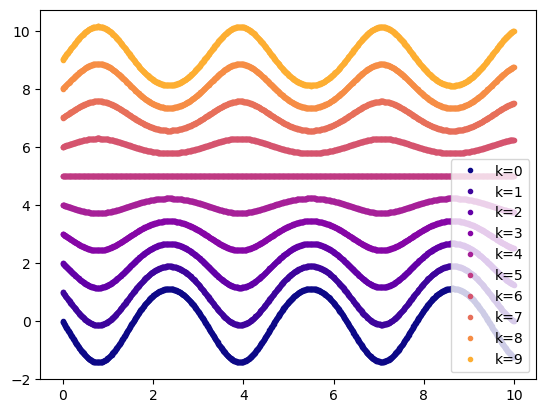

In [3]:
cmap = plt.cm.plasma #Esto es sólo para los colores del gráfico


# Aproximo por Euler explícito la sol. de la ec. dif. que me dan.

def funcion(t,x):
  y = (x - 5)*((np.cos(t))**2 - 0.5)
  return y

T = 10
t0 = 0

N = 11
h = 0.01
cant_pasos = (T - t0)/h

a = cant_pasos

#que el i recorra los k-es

for i in range(0, 10, 1):

  valores_t, valores_x = Euler_explícito(x0 = i, t0 = 0, h = 0.01, f = funcion, cant_pasos = int(a))

  color = cmap(i / 11)

  plt.plot(valores_t ,valores_x, '.', label='k={}'.format(i), color = color)

plt.legend()
plt.show()

Ej 5

In [4]:
def paso_taylor_orden_2(x, t, h, f, ft, fx):# fx y ft son las derivadas respecto de x y t de f
  k = ft(t,x) + fx(t,x)*f(t,x)
  x_sig = x + h*f(t,x) + 0.5*(h**2)*k
  return x_sig


def metodo_taylor_orden_2(x0, t0, h, f, ft, fx, cant_pasos):
  x = x0
  t = t0

  valores_x = np.array([]) #vector vacío
  valores_x = np.append(valores_x, x0) #agrego elemento al final

  valores_t = np.array([])
  valores_t = np.append(valores_t, t0) #agrego elemento al final

  for i in range(0,cant_pasos,1):
    
    x_sig = paso_taylor_orden_2(x, t, h, f, ft, fx)
    valores_x = np.append(valores_x, x_sig) #agrego elemento al final del vector

    t_sig = t + h
    valores_t = np.append(valores_t, t_sig) #agrego elemento al final del vector

    t = t_sig
    x = x_sig

  return valores_t, valores_x

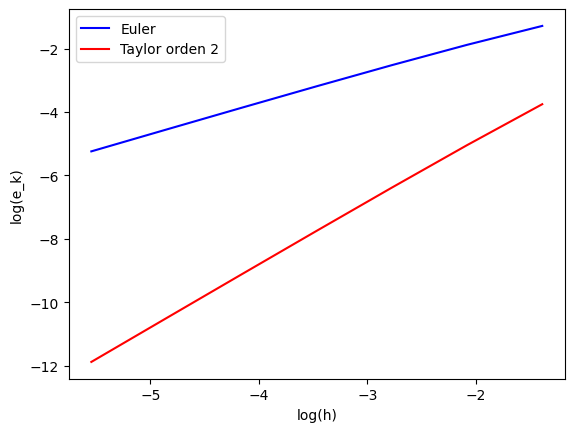

In [29]:

#errores al aproximar x(1) con euler, para cada k (o sea para cada h):
errores_euler = []

#errores al aproximar x(1) con taylor de orden 2, para cada k (o sea para cada h):
errores_taylor_2 = []

x0 = 1
t0 = 0

def f(t, x):
    y = x
    return y

def fx(t, x):
    y = 1
    return y

def ft(t,x):
    y = 0
    return y


sol_exacta = np.exp(1)

haches = [] #creo la lista con los h's


for k in range(2,8 + 1):

    h = 2**(-k)
    cant_pasos = int(np.round(1/h))

    #Uso el método de euler hasta T=1, o sea la cantidad de pasos es N = T/h = T/(2**(-k)), t0 = 1
    t_euler, x_euler = Euler_explícito(x0, t0, h, f, cant_pasos)

    errores_euler.append(np.abs((sol_exacta - x_euler[-1]))) #calculo el error


    #ahora uso el método de taylor de orden 2
    t_taylor, x_taylor = metodo_taylor_orden_2(x0, t0, h, f, ft, fx, cant_pasos)

    errores_taylor_2.append(np.abs((sol_exacta - x_taylor[-1])))

    #agrego las h's
    haches.append(h)



plt.plot(np.log(haches), np.log(errores_euler), "-b", label = 'Euler')
plt.plot(np.log(haches), np.log(errores_taylor_2), "-r", label = 'Taylor orden 2')
plt.legend()
plt.xlabel('log(h)')
plt.ylabel('log(e_k)')
plt.show()

